In [1]:
import numpy as np
import scipy
from scipy.sparse import dok_array
import networkx as nx
from collections import defaultdict, Counter
import itertools
from matplotlib.transforms import Bbox
import matplotlib.pyplot as plt

In [2]:
def rename_rdata_nodes(rdata, use_readname=False):
    # rename nodes
    if use_readname:
        for i,r in enumerate(rdata):
            r['name'] = r['rn']
    else:
        for i,r in enumerate(rdata):
            r['name'] = '$f_{%d}$' % (i+1)

    return


def rename_rdata_edges(rdata, use_tidx=False):
    for r in rdata:
        r['oldvec'] = r['vec'].copy()

    if use_tidx:
        return

    tcts = Counter()
    for r in rdata:
        for t in r['vec'].keys():
            tcts[t] += 1

    newnames = {}
    for i, (t, s) in enumerate(tcts.most_common()):
        newnames[t] = '$t_{%d}$' % (i+1)

    for r in rdata:
        rt = list(r['vec'].keys())
        for oldt in rt:
            r['vec'][newnames[oldt]] = r['vec'].pop(oldt)

    return


def make_nx_umi(rdata):
    n = len(rdata)

    rename_rdata_nodes(rdata)
    rename_rdata_edges(rdata)

    G = nx.Graph()
    for i, r in enumerate(rdata):
        G.add_node(r['name'])

    edge_labels = {}
    for i, j in itertools.combinations(range(n), 2):
        _inter = rdata[i]['vec'].keys() & rdata[j]['vec'].keys()
        if _inter:
            G.add_edge(rdata[i]['name'], rdata[j]['name'])
            edge_labels[rdata[i]['name'], rdata[j]['name']] = ','.join(map(str, sorted(_inter)))
    return G, edge_labels


def plot_nx_umi(G, edge_labels):
    options = {
        "font_size": 12,
        "node_size": 500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }

    pos = nx.spring_layout(G, seed=200)
    nx.draw_networkx(G, pos = pos, **options)
    edge_labels = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=8)


In [3]:
tracking_fn = '/Users/bendall/Development/stellarscope_testdata/full500/resumeCP1_ind-umi_tracking.txt'
umis = defaultdict(list)
with open(tracking_fn, 'r') as fh:
    bc, umi = (None, None)
    for l in fh:
        fields = l.strip('\n').split('\t')
        if fields[0]:
            bc, umi = fields
        else:
            _,rn,comp,exstr,vec = fields
            umis[(bc,umi)].append({
                'rn': rn,
                'comp': int(comp),
                'ex': False if exstr == 'REP' else True,
                'vec': eval(vec)
            })


In [4]:
len(umis)

165563

In [5]:
filt = {}
for (bc,umi), rdata in umis.items():
    if len(rdata) == 7 and max(r['comp'] for r in rdata) == 2:
        filt[(bc,umi)] = rdata

len(filt)

183

In [6]:
options = {
        "font_size": 12,
        "node_size": 500,
        "node_color": "white",
        "edgecolors": "gray",
        "linewidths": 1,
        "width": 1,
}

In [7]:
def doplot(bc,umi):
    rdata  = umis[(bc,umi)]
    G, edge_labels = make_nx_umi(rdata)
    # pos = nx.spring_layout(G, seed=200)
    pos = nx.kamada_kawai_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.planar_layout(G)
    nx.draw_networkx(G, pos = pos, **options)
    edge_labels = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6)
    return


In [8]:
list(filt.keys())[0]

('AATCACGTCCTTCACG', 'AGCCTCACTTTG')

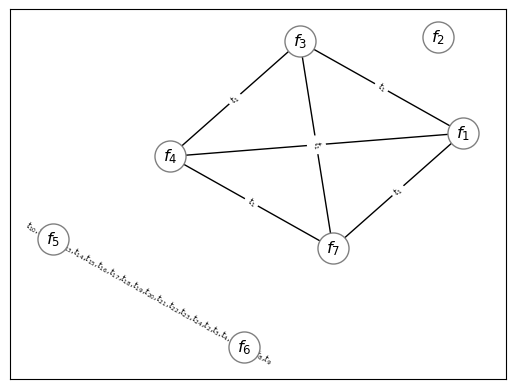

In [9]:
doplot(*list(filt.keys())[0])


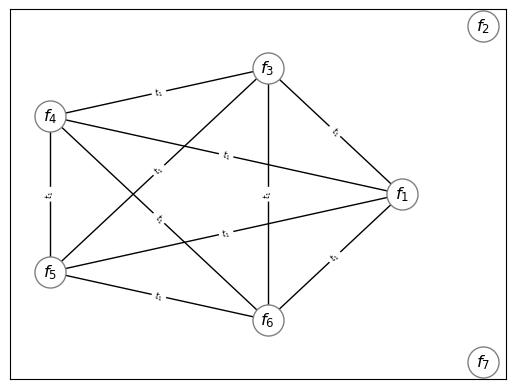

In [10]:
doplot(*list(filt.keys())[1])

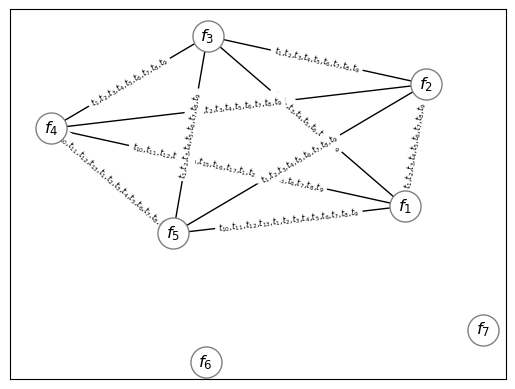

In [11]:
doplot(*list(filt.keys())[2])

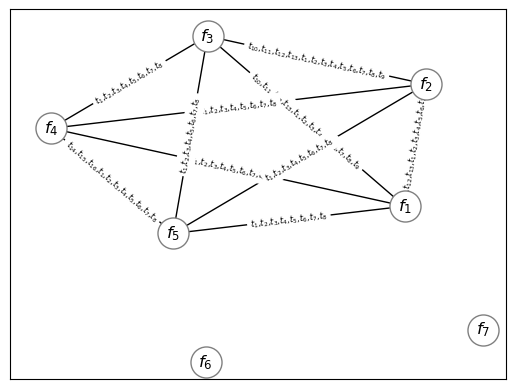

In [12]:
doplot(*list(filt.keys())[3])

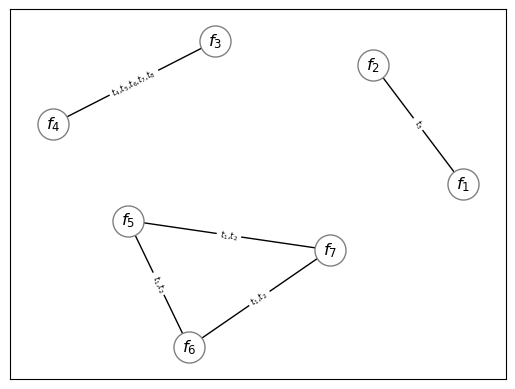

In [13]:
doplot(*list(filt.keys())[4])

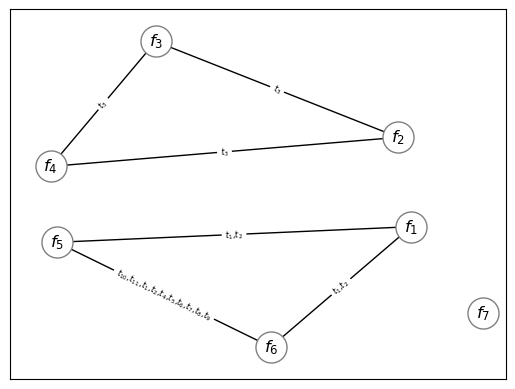

In [14]:
doplot(*list(filt.keys())[5])